{0}
{0, 1}
{0, 1, 2}


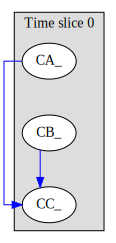

{}


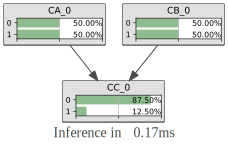

BayesianBKT Network with 1 on 3 knowledge_components.


In [1]:
import sys

sys.path.append("../")
from kgraph.expert_layer.domain_graph import DomainGraph
from kgraph.expert_layer.knowledge_components import KnowledgeComponent
from kgraph.expert_layer.links import LinkModel, LinkFromParents
from kgraph.resources_layer.exercise_family import ExerciseFamily
from kgraph.learner_layer.evaluation import Evaluation
from kgraph.learner_layer.learner_pool import LearnerPool
from elements.networks import BayesianBKTNetwork

# initiate the knowledge components and associated exercises
ex_a = ExerciseFamily(1, "Ex A")
kc_a = KnowledgeComponent(1, "A", ex_a)

ex_b = ExerciseFamily(1, "Ex B")
kc_b = KnowledgeComponent(1, "B", ex_b)

ex_c = ExerciseFamily(1, "Ex C")
kc_c = KnowledgeComponent(1, "C", ex_c)

# initiate the link model of the domain graph
c_from_parents_link = LinkFromParents(kc_c, [kc_a, kc_b])
link_model = LinkModel([c_from_parents_link])

# pack infos into domain graph
domain_graph = DomainGraph([kc_a, kc_b, kc_c], link_model)

# first example - no evaluations
evaluations = []
b_network_w_no_evals = BayesianBKTNetwork(domain_graph, evaluations)
print(b_network_w_no_evals)


100%|██████████| 3/3 [00:00<00:00, 34379.54it/s]

{0}
{0, 1}
{0, 1, 2}


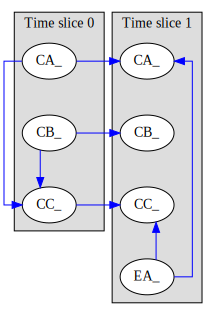

{'EvA_1': 1}


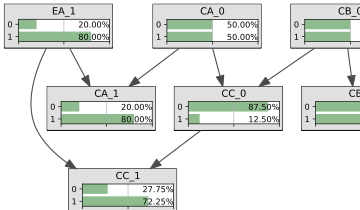

BayesianBKT Network with 2 on 3 knowledge_components.


In [2]:
# second example - 1 evaluation
learner_pool = LearnerPool(domain_graph)
learner = learner_pool.default_learner

ev_1 = ex_a.get_random_evaluation(learner)
evaluations = [ev_1]
b_network_w_1_eval = BayesianBKTNetwork(domain_graph, evaluations)
print(b_network_w_1_eval)


100%|██████████| 3/3 [00:00<00:00, 11586.48it/s]

{0}
{0, 1}
{0, 1, 2}


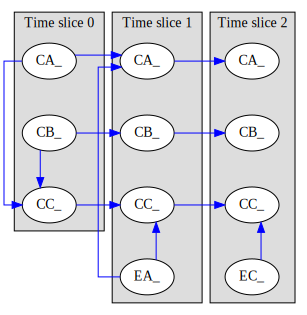

{'EvA_1': 1, 'EvC_2': 1}


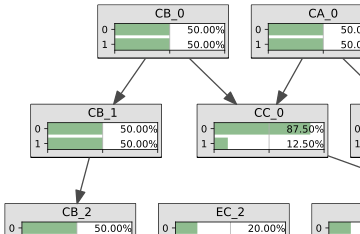

BayesianBKT Network with 3 on 3 knowledge_components.


In [3]:
# second example - 1 evaluation
learner_pool = LearnerPool(domain_graph)
learner = learner_pool.default_learner

ev_1 = ex_a.get_random_evaluation(learner)
ev_2 = ex_c.get_random_evaluation(learner)

evaluations = [ev_1, ev_2]
b_network_w_2_evals = BayesianBKTNetwork(domain_graph, evaluations)
print(b_network_w_2_evals)
